In [ ]:
"""
This notebook preforms an analysis of the data on shoe orders from 100 Shopify stores.
The purpose is to explore any trends and distributions within the data.
--------------------------
Author: Palvisha Sharma
"""


'\nThis notebook preforms an analysis of the data on shoe orders from 100 Shopify stores.\nThe purpose is to explore any trends and distributions within the data.\nThe data set can be found here: \n--------------------------\nAuthor: Palvisha Sharma\n'

In [ ]:
# import libraries
# since I am working on google colab, lines 7 and 8 refer to the 
# drive being mounted so that I can work with the sample data 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics
import numpy as np
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")
sns.set()


Mounted at /content/drive


# Exploratory Data Analysis


In [ ]:
# importing and printing the data header

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/ShopifyChallengeData.csv")
print(df.head())

   order_id  shop_id  user_id  ...  total_items  payment_method           created_at
0         1       53      746  ...            2            cash  2017-03-13 12:36:56
1         2       92      925  ...            1            cash  2017-03-03 17:38:52
2         3       44      861  ...            1            cash   2017-03-14 4:23:56
3         4       18      935  ...            1     credit_card  2017-03-26 12:43:37
4         5       18      883  ...            1     credit_card   2017-03-01 4:35:11

[5 rows x 7 columns]


In [ ]:
# ensure that there are no null values in the data set
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

There are no null values in the data set

In [ ]:
# determining the columns in the data

df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [ ]:
# determining the shape of our data, this can be used to determine the 
# number of features and amount of data 
df.shape

(5000, 7)

In [ ]:
# since the point of focus is the order amount, I will preform an analysis of the data below
print(df["order_amount"])

0       224
1        90
2       144
3       156
4       156
       ... 
4995    330
4996    234
4997    351
4998    354
4999    288
Name: order_amount, Length: 5000, dtype: int64


In [ ]:
# maximum value in the data set 
df["order_amount"].max()

704000

In [ ]:
# minimum value in the data set
df["order_amount"].min()

90

Looking at the maxiumum and minimum amounts, the maximum amount is unreasonably high (definitely a lot closer to house prices in toronto than a shoe). Extreme data points such as this, skew the mean of the data, which is why the average is much higher than expected. 

In [ ]:
# mean of the order_amount 
df["order_amount"].mean()


3145.128

In [ ]:
# median of the order_amount

df["order_amount"].median()


284.0

In [ ]:
# mode of the order_amount

df["order_amount"].mode()


0    153
dtype: int64

In [ ]:
# standard deviation of my data 
df["order_amount"].std()

41282.539348788196

The standard deviation of my data is very high, suggesting that most data points do not agree with the AOV. This confirms that the mean is not an appropriate metric for the AOV.

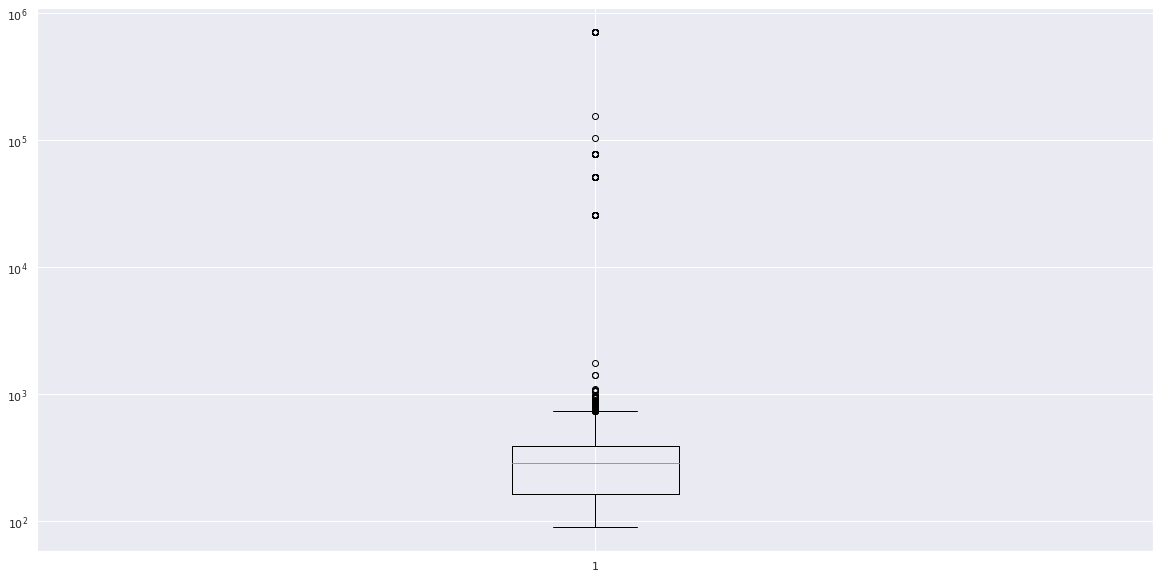

In [ ]:
# I can represent the data points relative to the median through a box plot
# to get a better understanding of the general data that I have, and any outliers

plt.figure(figsize=(20,10))
plt.yscale("log")
plt.boxplot(df["order_amount"])
plt.show()


I can see that my data is skewed, and does not follow a normal distribution since the median is not centered withing the boxplot. I can also see that the interquartile range is within an order of magnitude of 10^2, as well as the maximum and minimum values, suggesting that the order amounts enerally fall within the  100s range. The outliers are in the thousands. Therefore, a good order of magnitude estimate for the AOV would be 10^2. I can analyze my data's distribution better with a histogram.

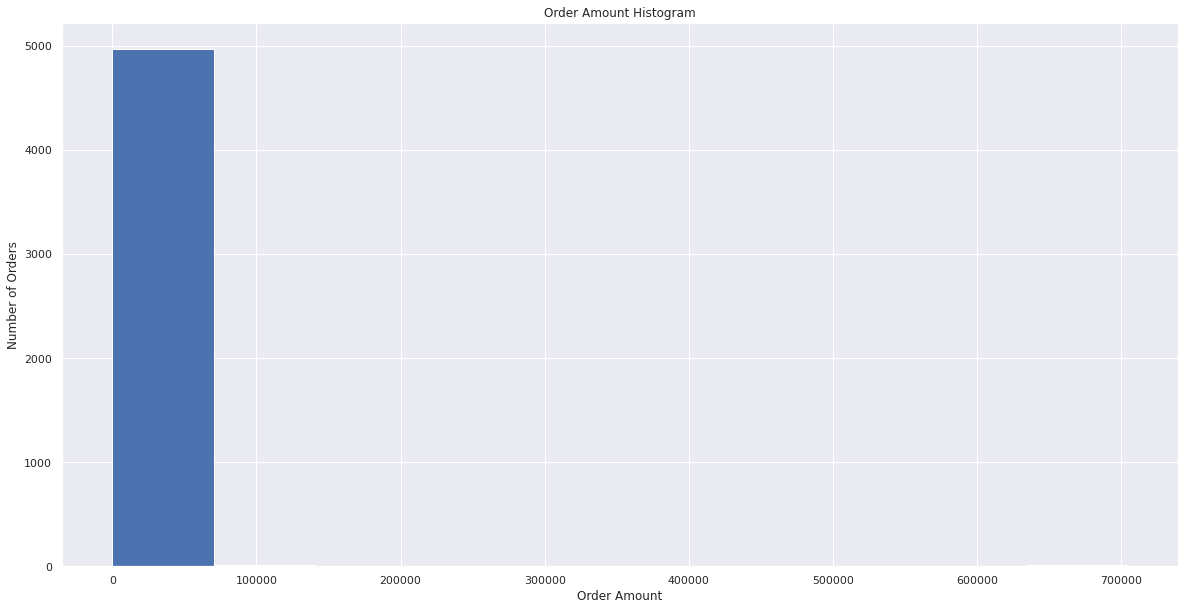

In [ ]:
# plot the distribution of order amounts 

plt.figure(figsize=(20,10))
plt.hist(df["order_amount"])
plt.title("Order Amount Histogram")
plt.xlabel("Order Amount")
plt.ylabel("Number of Orders")
plt.show()

 

I know that there must be some values that fall on the 700 000 section of the histogram due to my analysis above, however my histogram does not show those values.  This is because of the extreme difference in order amounts, with the maximum being in the thousands, compared to the most common value in the hundreds (as per the calculated mode)

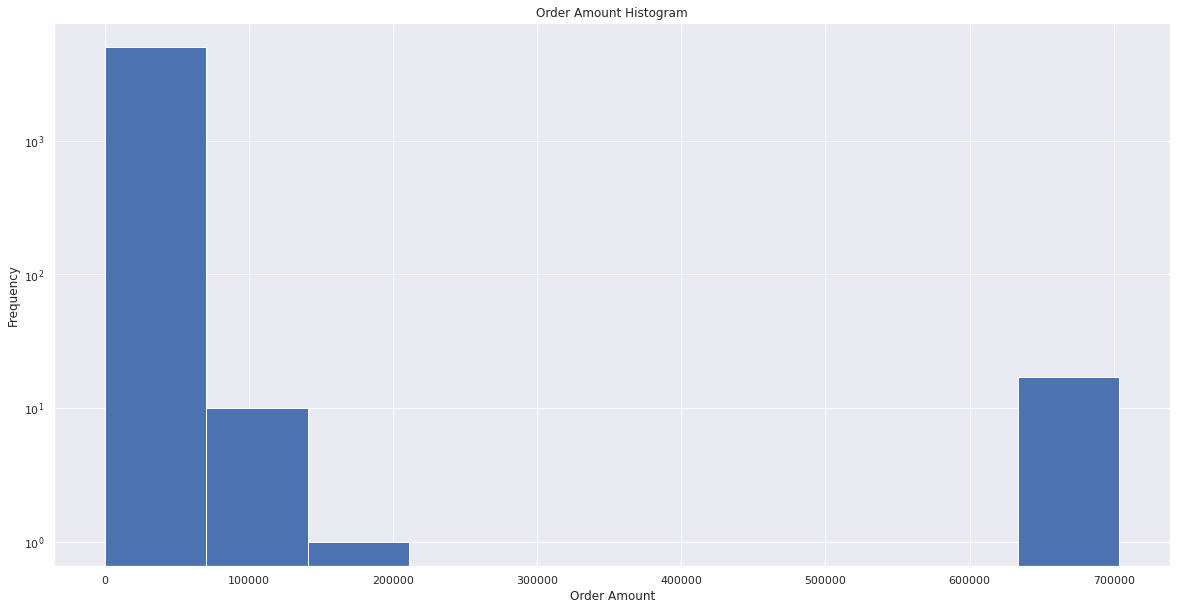

In [ ]:
# another attempt at plotting my histogram by scaling with logarithmic scaling.

plt.figure(figsize=(20,10))
plt.yscale("log")
plt.hist(df["order_amount"])
plt.title("Order Amount Histogram")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()


This is much better! Now, I have a  histogram of the data in the `order_ammount` column that is readable. I did not normalize this histogram since the y axis was scaled logarithmically, which would make the y axis less intuitive to understand if the histogram was normalized before the yaxis was scaled. The shape of the expected histogram is preserved.

Looking at this histogram, the data is skewed to the right since it is an asymmetric distribution with a right ended tail. This means that the mean is higher than the middle and most frequently occuring values, confirming that it is not a good representation of the data. 

The histogram also represents a skew in the distribution of continuous data rather than categorical, as such I will opt to report the median of the `order_amount`, rather than the mode. The median better represents continuous data that does not follow a normal distribution, and the mode better represents the distribution of categorical (non-continuous) data. Although, both can be reported for a continuous data set.

The median of the order amounts is 284.00 hence, I can expect the AOV and general cost of shoes from the shopify stores to be around $ 284.00.

Looking at the above exploration of the data provided, it is evident that the mistake made in calculating the AOV by taking the average of values was that the distribution of the data was not considered. The mean best represents data that follows a normal distrbution as it is an appropriate measure of central tendency in normal distrbutions. However, the data for the order amounts did not follow a normal distribution, and a better measure of central tendency was determined to be the median. As well, considering that the maximum order amount is around ~700K, nowhere near the general cost of shoes, it is clear that the average of these values would be very skewed (as determined).

I decided to check one more thing with the data and calculate the average cost of each shoe below.  

In [ ]:
# average cost of each shoe
# the average cost of each shoe is the total amount of money spent on shoes across all orders
# divided by the total number of shoes purchased across all orders 

avg_shoe_cost = np.sum(df["order_amount"]/ np.sum(df["total_items"]))
print(avg_shoe_cost)

357.9215222141296


The average cost of each shoe calculated is around 358 dollars, while my reported AOV is 284. Thus, the median is a decent metric for the AOV.